In [289]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 관련 변수들
DIR = '../Data/'
FILE = DIR + 'titanic.csv'

In [290]:
# DF 정보 확인
titanicDF.head()

,PassengerId,Survived,Survived_label,Pclass,Pclass_label,Name,Sex,Age,Age_02,Age_02_label,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,사망,3,다,"Braund, Mr. Owen Harris",male,22.0,22,~30대,1,0,A/5 21171,7.2500,NaN,S
1,2,1,생존,1,가,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,38,~30대,1,0,PC 17599,71.2833,C85,C
2,3,1,생존,3,다,"Heikkinen, Miss. Laina",female,26.0,26,~30대,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,생존,1,가,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,35,~30대,1,0,113803,53.1000,C123,S
4,5,0,사망,3,다,"Allen, Mr. William Henry",male,35.0,35,~30대,0,0,373450,8.0500,NaN,S


In [291]:
titanicDF = pd.read_csv(FILE)
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. 각 컬럼별 자료의 의미

PassengerId : 승선자들 일련번호
Survived : 생존 여부(생존은 1, 아닌 경우는 0)  
Pclass : Passenger Class, 승객 등급  
Name : 승객 이름  
Sex : 승객 성별  
Age : 승객 나이  
Sibsp : 동승한 형제 또는 배우자 수  
Parch : 동승한 부모 또는 자녀 수  
Ticket : 티켓 번호  
Fare : 승객 지불 요금  
Cabin : 선실 이름  
Embarked : 승선항(C=쉘 부르크, Q=퀸즈타운, S=사우스 햄튼)

## 2. 데이터의 구분

### 2-1) 각 컬럼 데이터가 분류 분석에 미칠 영향에 대한 객관적 탐색 (아래 부분은 주관적으로 한 것이라 볼 수 있음)

In [292]:
# - 데이터를 그룹(생존자 그룹 / 비생존자 그룹)으로 나누어 컬럼의 그룹 간 차이를 탐색하는 것

In [293]:
# 구분형(Pclass, Sex, Embarkded)  vs.  수치형(Age, Sibsp, Parch, Fare) 중 구분형을 살펴봄

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:>

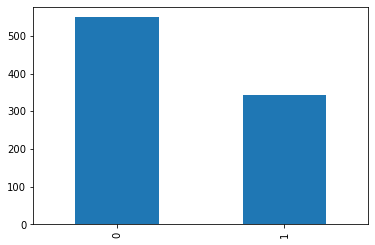

In [294]:
print(titanicDF['Survived'].value_counts())
titanicDF['Survived'].value_counts().plot.bar()

In [295]:
# - 생존 여부 (생존 = 1, 아닌 경우 = 0)인 survived를 그룹으로 하여 pclass 컬럼/의 그룹별 분포를 출력한 결과는 아래와 같았음
# seaborn의 countplot이라는 함수를 사용하면 아래와 같은 그래프를 출력할 수 있습니다. 그룹 비율은 약 3:5 정도로 나타났고,
# 그룹별 pclass의 분포는 상이하게 나타남
# => 이를 통해 pclass 피처는 생존자 분류에 유의미한 영향을 미친다는 가설을 세워 볼 수 있음.

3    491
1    216
2    184
Name: Pclass, dtype: int64


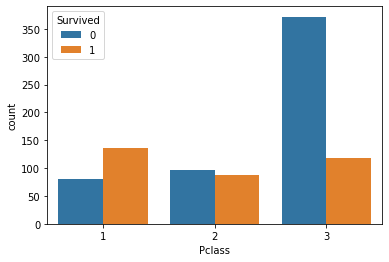

In [296]:
# Survived 피처를 기준으로 그룹을 나누어, 그룹별 Pclass 컬럼의 분포를 살펴봄.  =>  3개 이상의 그룹으로 나뉘는 것
print(titanicDF['Pclass'].value_counts())
ax1 = sns.countplot(x='Pclass', hue = 'Survived',  data = titanicDF)

male      577
female    314
Name: Sex, dtype: int64


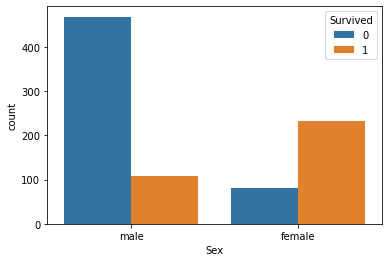

In [297]:
# Survived 피처를 기준으로 그룹을 나누어, 그룹별 Sex 컬럼의 분포를 살펴봄.
print(titanicDF['Sex'].value_counts())
ax2 = sns.countplot(x='Sex', hue = 'Survived',  data = titanicDF)

In [298]:
# 해당 컬럼이 남/여 2개의 그룹으로 밖에 나누어지지 않지만, 성별 생존율을 봤을 때 여성이 더 높은 것을 알 수 있음

S    644
C    168
Q     77
Name: Embarked, dtype: int64


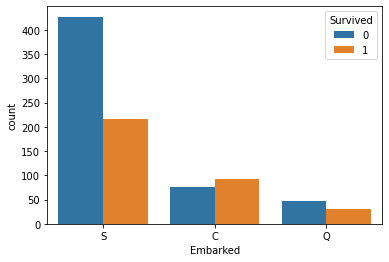

In [299]:
# Survived 피처를 기준으로 그룹을 나누어, 그룹별 Embarked 컬럼의 분포를 살펴봄.
print(titanicDF['Embarked'].value_counts())
ax2 = sns.countplot(x='Embarked', hue = 'Survived',  data = titanicDF)

In [300]:
# 정해진 항로를 얼마나 지나왔는지, 어느 지점에서 사고가 발생했는지 여부를 알 수 없기도 하고,
# 승선항과 승객들과의 연관 관계를 밝히기 힘들 것 같아 배제

### 2-2) 목표에 부합하지 않아서 필요하지 않거나, 즉시 분석에 필요한 데이터가 아니라고 주관적으로 판단한 부분
(단순히 승객들의 구분을 위한 id 성격의 데이터들은 거의 포함되는 것이라 생각함 (PassengerId 같은 경우))

- 'PassengerId', 'Name', 'Ticket', ' Embarked', 'Cabin' 
    - PassengerId : 일련번호로 사람을 카운팅 할 수 있는 고유번호 느낌. 즉시 분석이 쓰일 것 같지는 않다고 판단
    - Name, Ticket, Embarked  : 생존여부와 큰 영향이 없을 것으로 판단
    - Cabin : 승객들이 배정받는 선실을 말하는 것은 아닌 것 같음. 결측치도 많고. 선원들이 배정받는 공간인 것 같으므로 배제

In [301]:
# 2-2)로 분류한 부분을 drop해야 하지만 일단 원본 파일 그대로 진행
# -> 전처리를 통해 생성되는 컬럼들이 많다면 새로 만드는 것도 괜찮을 것 같은데,,
# -> but, 혹시 예상치 못한 다른 컬럼과의 상관관계를 발견할 수도 있으니 원본에 넣을 수도 있겠다는 생각이 들었음

# 분석의 목표에 부합하지 않거나, 당장 분석에 사용할 수 없는 경우나, 분석에 큰 영향을 미칠 것 같지 않은 컬럼들
# => drop으로 삭제를 해준다 (원본은 유지해주도록 하면서)
# 분석할 데이터들의 결측치들을 파악하여 전처리 과정을 진행한다

### 2-2) 분석에 필요하다고 판단, 전처리를 해야 한다고 판단한 부분
- 'Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare'
    - Survived : 기준
    - Pclass : 배정받은 선실의 위치/안전성 등에 차이가 생존 여부에 영향을 미칠 것으로 판단
    - Sex : 남자와 여자의 성별에 따라 생물학적/사회적 영향을 받아 생존 여부에 차이가 있을 것으로 판단
    - Age : 구조받기까지 생존할 수 있는 능력에 상당한 영향을 미칠 것으로 판단
    - Sibsp, Parch : 동승한 형제/배우자/부모/자녀의 수에 따라 사건 발생했을 때, 생존율에 영향을 미칠 것으로 판단
    - Fare : 승객이 지불한 요금이 많을 수록, 형편이나 부의 정도를 어느 정도 유추할 수 있을 것이라 판단 (어느 정도만)    

## 3. 각 데이터 상태 확인 -> 분석을 위해 수정이 필요한 컬럼들 전처리 진행

In [302]:
# 컬럼별 데이터 형태
titanicDF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [303]:
# 컬럼별 결측치 확인
titanicDF.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Survived
- 생존 / 사망으로 구분한 것 같음.
- 0 -> 사망, 1 -> 생존 으로 구분.
- category로 형변환  =>  금일 수업 origin 컬럼 처리 했던 것 참고 

In [304]:
# 2가지 밖에 값이 없음 (set, unique로 확인)
print(f"set : {set(titanicDF['Survived'])}\nunique : {titanicDF['Survived'].unique()}")

set : {0, 1}
unique : [0 1]


In [305]:
titanicDF.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [306]:
# survived 컬럼 라벨 데이터 생성(시리즈)
survivedLabel = titanicDF['Survived'].replace({0:'사망', 1:'생존'})

# i) 시리즈만 생성한 상태로 유지
# => 전처리를 한 시리즈들만 모아서 별도의 DF를 만들 예정 (일단 이런 방식으로 진행해보고 피드백 할 것)

# ii) DF에 컬럼 추가 
# => 여기서는 원본에 추가하지는 않을 것이지만, 추가하는 경우 이런 식으로 추가해야 할 듯
# => 추가할 인덱스 번호를 제대로 뽑아내도록 해야 함
titanicDF.insert(2, 'Survived_label', survivedLabel)

In [307]:
titanicDF

,PassengerId,Survived,Survived_label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,사망,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,생존,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,생존,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,생존,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,사망,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,사망,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,생존,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,사망,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,생존,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [308]:
# 해당 컬럼 category로 형변환
titanicDF[['Survived','Survived_label']] = titanicDF[['Survived','Survived_label']].astype('category')

# 데이터 타입 수정 여부 확인
titanicDF.dtypes

PassengerId          int64
Survived          category
Survived_label    category
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

### Pclass

In [309]:
# 승객 등급을 나누는 것이므로 category로 해 주도록 하자 (1,2,3이 있으니까)
# 하지만, 등급이 어떤 식으로 나누어져 있는지 알 수 없으니 일단 '가,나,다'로 해 놓기로 함 => 수정만 하면 되게끔
# 하지만, 위에서도 살펴봤듯이, 상관관계는 있는 것 같으나, 현재 배운것까지만 한다고 치면,
# 어떠한 분석 방법을 쓸 수도 없는 상황이기 때문에, 라벨 생성/DF에 라벨 컬럼 추가/카테고리로 형 변환. 이정도 밖에 할 수 없었음

# 현재, '1,2,3으로 적혀있는 카테고리마다 생존여부의 상이한 관계가 있음' 정도까지는 알았기 때문에
# 향후, 분석하는 함수를 만든다거나, 통계적 처리를 배워서 적용한다면  =>  어떤 관계가 있는지, 유의미하다고 할 수 있는지 알 수 있을듯

In [310]:
titanicDF['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [311]:
titanicDF['Pclass'].value_counts()
# 1:2:3 = 가:나:다 => 뭘로 구분해야되징

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [312]:
titanicDF.columns

Index(['PassengerId', 'Survived', 'Survived_label', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [313]:
# Pclass 컬럼 라벨 데이터 생성
pclassLabel = titanicDF['Pclass'].replace({1:'가', 2:'나', 3:'다'})

# DF에 컬럼 추가
titanicDF.insert(4, 'Pclass_label', pclassLabel)

In [314]:
# 해당 컬럼 category로 형변환
titanicDF[['Pclass','Pclass_label']] = titanicDF[['Pclass','Pclass_label']].astype('category')

# 데이터 타입 수정 여부 확인
titanicDF.dtypes

PassengerId          int64
Survived          category
Survived_label    category
Pclass            category
Pclass_label      category
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

### Sex

In [315]:
titanicDF.dtypes

PassengerId          int64
Survived          category
Survived_label    category
Pclass            category
Pclass_label      category
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

In [316]:
# 남/녀만 있으니까 이 또한 카테고리로 바꿔주는 작업만
# 굳이 한글로 '남/여'로 바꿔주지 않는다면 할 필요 없을 것임
# Object니까 굳이 데이터 형태를 바꿔줄 필요는 없다고 판단함

# # sex 컬럼 라벨 데이터 생성
# sexLabel = titanicDF['Sex'].replace({'male':'남성', 'female':'여성'})

# # DF에 컬럼 추가
# titanicDF.insert(2, 'Sex_label', sexLabel)

In [317]:
# titanicDF.info()로도 봤듯이 결측치는 없음
# 추가적으로 결측치 확인시
# titanicDF['Sex'].isna().sum()
# titanicDF['Sex'].isnull().sum()

### Age

In [318]:
# 처음엔, 숫자로된 '나이'로 생각하기보다는 나이의 '숫자'에 매몰되어서 => '연산'을 먼저 생각해서
# 해당 컬럼의 활용에 대해 '나이를 '정수'로만 바꾸려는 생각을 했었기 때문에 행한 전처리가 있었음

# 하지만, 해당 컬럼의 '나이/연령대'와 '생존여부'를 연관지어볼 때, 숫자의 연산보다는 '연령대의 생존여부'에 대해
# 파악하는 게 맞다고 느낌

In [319]:
titanicDF['Age'].dtype

dtype('float64')

In [320]:
titanicDF['Age'].isna().sum()
# titanicDF['Age'].isnull().sum()

177

###### Age i) 나이의  '숫자'

In [321]:
# titanicDF['Age'].unique()
# NaN 값도 있고, 나이임에도 불구 소수로 된 것도 있음

In [322]:
# i) NaN 값은 평균으로 채우고, 소수는 소수점을 처리해서 정수로 바꾼 값을 채우고 싶었음
# ii) 아니면 소수점은 그대로 두고, NaN값만 평균으로 처리해주는 것으로

In [323]:
# Age 컬럼에 대한 데이터 값 확인
titanicDF['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [324]:
# Age의 평균값으로 NaN을 채워주기 위해 
# ageMean = titanicDF['Age'].mean()
# ageMean
# titanicDF['Age'] = titanicDF['Age'].fillna(value = ageMean)

In [325]:
# 단, 주의!! 다른 컬럼과의 관계가 있을 수 있으므로(Survived 컬럼과 성별 컬럼의 값에 따라 나이의 평균값이 다를 수도 있다는 것)

In [326]:
# 비율이 딱 5:5로 나뉘어 지는 것도 아니고
titanicDF['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [327]:
# 남자가 더 많음
titanicDF['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [328]:
# 따라서, Survived와 성별에 따라 그룹화(groupby) -> 그 그룹별로 평균값을 찾아야 함
print(f"----- 그룹화o : {titanicDF.groupby(['Survived','Sex']).Age.mean()}---",
      f"----- 그룹화x : {titanicDF.Age.mean()}", sep='\n\n')

----- 그룹화o : Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64---

----- 그룹화x : 29.69911764705882


In [329]:
# 그룹별 평균을 결측치로 채워 넣으면서 새로운 시리즈를 만들어서 => Age_02 컬럼을 추가
Age_02 = titanicDF.groupby(['Survived','Sex']).Age.transform(lambda g: g.fillna(g.mean()))

In [330]:
Age_02

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    25.046875
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [331]:
# 정수로 만들어 주기
# titanicDF['Age'] = titanicDF['Age'].astype('int64')

In [332]:
# 결측치 개수 확인
titanicDF['Age'].isna().sum()

177

In [333]:
# Age 컬럼에 대한 데이터 값 확인
titanicDF['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [334]:
# 어떤 값으로 해당 결측치를 채울 것인가
# i) 평균값을 누락값을 채운다
# 단, 주의!! 다른 컬럼과의 관계가 있을 수 있으므로(Survived 컬럼과 성별 컬럼의 값에 따라 나이의 평균값이 다를 수도 있다는 것)
# 

In [335]:
# 비율이 딱 5:5로 나뉘어 지는 것도 아니고
titanicDF['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [336]:
# 남자가 더 많음
titanicDF['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [337]:
# 따라서, Survived와 성별에 따라 그룹화(groupby) -> 그 그룹별로 평균값을 찾아야 함
print(f"----- 그룹화o : {titanicDF.groupby(['Survived','Sex']).Age.mean()}---",
      f"----- 그룹화x : {titanicDF.Age.mean()}", sep='\n\n')

----- 그룹화o : Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64---

----- 그룹화x : 29.69911764705882


In [338]:
# 그룹별 평균을 결측치로 채워 넣으면서 새로운 시리즈를 만들어서 => Age_02 컬럼을 추가
Age_02 = titanicDF.groupby(['Survived','Sex']).Age.transform(lambda g: g.fillna(g.mean()))

In [339]:
Age_02

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    25.046875
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [340]:
# 넣을 컬럼 인덱스 확인
titanicDF.columns[7]

# DF에 컬럼 추가
titanicDF.insert(8, 'Age_02', Age_02)
# => 이미 만들어줬기 때문에 오류 생겨서 주석 걸고

In [341]:
# 확인
titanicDF

,PassengerId,Survived,Survived_label,Pclass,Pclass_label,Name,Sex,Age,Age_02,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,사망,3,다,"Braund, Mr. Owen Harris",male,22.0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,생존,1,가,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,생존,3,다,"Heikkinen, Miss. Laina",female,26.0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,생존,1,가,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,사망,3,다,"Allen, Mr. William Henry",male,35.0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,사망,2,나,"Montvila, Rev. Juozas",male,27.0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,생존,1,가,"Graham, Miss. Margaret Edith",female,19.0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,사망,3,다,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,25.046875,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,생존,1,가,"Behr, Mr. Karl Howell",male,26.0,26.000000,0,0,111369,30.0000,C148,C


###### Age ii) 숫자의 '나이'

In [342]:
# Age_02 컬럼 타입 변경
# titanicDF['Age_02'].astype['int64']

# 일단 실수로도 범위로도 범주형 category로 변환 가능한지 확인

In [343]:
titanicDF['Age_02']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    25.046875
889    26.000000
890    32.000000
Name: Age_02, Length: 891, dtype: float64

In [344]:
# category로 타입 변환
titanicDF['Age_02'] = titanicDF['Age_02'].astype('int64')
titanicDF['Age_02'].dtype
# titanicDF['Age_02']=pd.to_numeric(titanicDF['Age_02'])


dtype('int64')

In [350]:
# Age_02의 최대값이 80임을 확인
titanicDF['Age_02'].max()

# Age_02를 범주형으로 나눠보자 
titanicDF['Age_02_label'] = pd.cut(x = titanicDF['Age_02'], bins=4,
                                  labels = ['~10대','~30대','~50대','50대~'], include_lowest = True)

In [346]:
# 누락된 사항은 없음을 확인
titanicDF['Age_02_label'].value_counts().sum()

891

In [347]:
# 카테고리로 형 변환
titanicDF['Age_02_label']=titanicDF['Age_02_label'].astype('category')

# 라벨을 별도로 시리즈로 저장
Age_02_label = titanicDF['Age_02_label']

In [354]:
titanicDF = titanicDF.drop('Age_02_label', axis=1)

In [355]:
# 라벨을 DF에 삽입
titanicDF.insert(9, 'Age_02_label', Age_02_label)

In [356]:
titanicDF

,PassengerId,Survived,Survived_label,Pclass,Pclass_label,Name,Sex,Age,Age_02,Age_02_label,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,사망,3,다,"Braund, Mr. Owen Harris",male,22.0,22,~30대,1,0,A/5 21171,7.2500,NaN,S
1,2,1,생존,1,가,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,38,~30대,1,0,PC 17599,71.2833,C85,C
2,3,1,생존,3,다,"Heikkinen, Miss. Laina",female,26.0,26,~30대,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,생존,1,가,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,35,~30대,1,0,113803,53.1000,C123,S
4,5,0,사망,3,다,"Allen, Mr. William Henry",male,35.0,35,~30대,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,사망,2,나,"Montvila, Rev. Juozas",male,27.0,27,~30대,0,0,211536,13.0000,NaN,S
887,888,1,생존,1,가,"Graham, Miss. Margaret Edith",female,19.0,19,~10대,0,0,112053,30.0000,B42,S
888,889,0,사망,3,다,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,25,~30대,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,생존,1,가,"Behr, Mr. Karl Howell",male,26.0,26,~30대,0,0,111369,30.0000,C148,C


In [359]:
titanicDF.dtypes

PassengerId          int64
Survived          category
Survived_label    category
Pclass            category
Pclass_label      category
Name                object
Sex                 object
Age                float64
Age_02               int64
Age_02_label      category
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

In [357]:
titanicDF.corr(method='pearson', min_periods=1)

,PassengerId,Age,Age_02,SibSp,Parch,Fare
PassengerId,1.000000,0.036847,0.035524,-0.057527,-0.001652,0.012658
Age,0.036847,1.000000,0.999973,-0.308247,-0.189119,0.096067
Age_02,0.035524,0.999973,1.000000,-0.241480,-0.184507,0.089988
SibSp,-0.057527,-0.308247,-0.241480,1.000000,0.414838,0.159651
Parch,-0.001652,-0.189119,-0.184507,0.414838,1.000000,0.216225
Fare,0.012658,0.096067,0.089988,0.159651,0.216225,1.000000


## 4. 데이터 정규화

In [363]:
# 비교할 컬럼들만 정규화 해보자
data1 = titanicDF['Age_02']
data2 = titanicDF['SibSp']
data3 = titanicDF['Parch']
data4 = titanicDF['Fare']

In [367]:
titanicDF['Age_02_P'] = (data1 - data1.mean()) / data1.std()
titanicDF['SibSp_P'] = (data2 - data2.mean()) / data2.std()
titanicDF['Parch_P'] = (data3 - data3.mean()) / data3.std()
titanicDF['Fare_P'] = (data4 - data4.mean()) / data4.std()

In [368]:
titanicDF

,PassengerId,Survived,Survived_label,Pclass,Pclass_label,Name,Sex,Age,Age_02,Age_02_label,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_02_P,SibSp_P,Parch_P,Fare_P
0,1,0,사망,3,다,"Braund, Mr. Owen Harris",male,22.0,22,~30대,1,0,A/5 21171,7.2500,NaN,S,-0.585242,0.432550,-0.473408,-0.502163
1,2,1,생존,1,가,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,38,~30대,1,0,PC 17599,71.2833,C85,C,0.641340,0.432550,-0.473408,0.786404
2,3,1,생존,3,다,"Heikkinen, Miss. Laina",female,26.0,26,~30대,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.278597,-0.474279,-0.473408,-0.488580
3,4,1,생존,1,가,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,35,~30대,1,0,113803,53.1000,C123,S,0.411356,0.432550,-0.473408,0.420494
4,5,0,사망,3,다,"Allen, Mr. William Henry",male,35.0,35,~30대,0,0,373450,8.0500,NaN,S,0.411356,-0.474279,-0.473408,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,사망,2,나,"Montvila, Rev. Juozas",male,27.0,27,~30대,0,0,211536,13.0000,NaN,S,-0.201935,-0.474279,-0.473408,-0.386454
887,888,1,생존,1,가,"Graham, Miss. Margaret Edith",female,19.0,19,~10대,0,0,112053,30.0000,B42,S,-0.815226,-0.474279,-0.473408,-0.044356
888,889,0,사망,3,다,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,25,~30대,1,2,W./C. 6607,23.4500,NaN,S,-0.355258,0.432550,2.007806,-0.176164
889,890,1,생존,1,가,"Behr, Mr. Karl Howell",male,26.0,26,~30대,0,0,111369,30.0000,C148,C,-0.278597,-0.474279,-0.473408,-0.044356


In [ ]:
# cut
# retbins = True => 반환값이 2개가 넘어옴
# retbins = x   직접 넣어줘라
# 파라미터 봐보셈
